In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Levantar los datos del archivo CSV.

In [ ]:
Alturas=pd.read_csv("http://pilas.exp.dc.uba.ar/datos/alturas/alturas_500_0.csv")

2. Identificar el nombre de las columnas (variables) del archivo de datos.

In [ ]:
variables= Alturas.columns
print(variables)

Index(['altura', 'genero', 'contextura_madre', 'altura_madre'], dtype='object')


3. ¿Cuántos individuos conforman tu conjunto de observaciones?

In [ ]:
informacion_data= Alturas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   altura            500 non-null    float64
 1   genero            500 non-null    object 
 2   contextura_madre  500 non-null    object 
 3   altura_madre      500 non-null    float64
dtypes: float64(2), object(2)
memory usage: 15.8+ KB


Mirando el RangeIndex determinamos que el dataframe contiene 500 respuestas es decir 500 individuos. 

4- Calcular el promedio de las alturas de los hijos. Este valor se podría usar para predecir la altura de
un nuevo individuo, ¿no?

In [ ]:
promedio_altura_todes= Alturas['altura'].mean()
print(promedio_altura_todes)

165.5456


5. ¿Con qué valor se puede predecir la altura de un nuevo individuo masculino?

In [ ]:
Filtro_M=Alturas['genero']=="M" 
Alturas['altura'][Filtro_M]
prom_m=Alturas['altura'][Filtro_M].mean()
print(prom_m)

172.43858921161836


6. ¿Con qué valor se puede predecir la altura de un nuevo individuo masculino cuya madre es bajita?

In [ ]:
Filtro_bajita=Alturas['contextura_madre']=="bajita"
Prom_myb=Alturas['altura'][Filtro_M & Filtro_bajita].mean()
print(Prom_myb)

170.06874999999997


## **Ejercicio Fuera de clase**

7. a) Graficar altura de mamá (en el eje x) vs. altura del hijo (eje y), utilizando un color por cada género.
¿Qué se puede observar? Explorar hue para agrupar (según una nueva variable) y producir puntos
de diferentes colores.

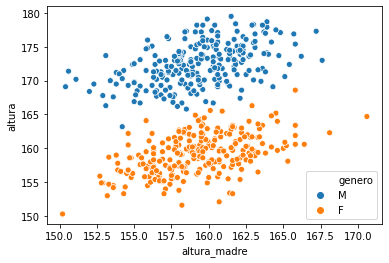

In [ ]:
sns.scatterplot(x=Alturas['altura_madre'], y=Alturas['altura'], hue= Alturas['genero'])

7- B) En adelante, trabajaremos con los datos de los hijos (género masculino); volvamos a graficar la altura
de mamá (en el eje x) vs. altura del hijo (eje y), cuando genero=="M".

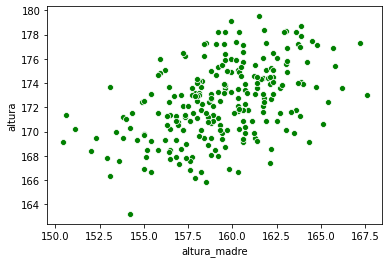

In [ ]:
sns.scatterplot(x=Alturas['altura_madre'], y=Alturas['altura'][Filtro_M],data=Alturas, color = "green")

8. Indicar si hay alguna madre de altura 156:5 cm con un hijo varón. ¿Cuántas son?

In [ ]:
filtro156=Alturas['altura_madre']==156.5
hijo_varon_madre_156= Alturas['altura'][Filtro_M & filtro156]

9. Vamos ahora a predecir la altura de un hijo correspondiente a una mamá que mide x_nuevo=156:5 cm haciendo promedio móvil (o promedio local) centrado en 156:5 cm con ventana de tamaño h =1 (cm).

Atención: Ventana h=1 indica que hay que mirar h=1 a derecha y h=1 a izquierda.

a) Indicar cuántos casos hay donde la madre registra una altura de 155:5 cm a 157:5 cm, inclusive.

b) Calcular el promedio de la altura de los hijos cuyas madres registran una altura de 155:5 cm a
157:5 cm.

In [ ]:
Alturas_M= Alturas[Filtro_M]

In [ ]:
Filtro_155=Alturas_M['altura_madre']>155.5
Filtro_157=Alturas_M['altura_madre']<157.5

Alturas_M['altura'][ Filtro_155 & Filtro_157].shape

(35,)

In [ ]:
Prom_hijos_156=Alturas_M['altura'][ Filtro_155 & Filtro_157].mean()
print(Prom_hijos_156)

171.1657142857143


10. Promedio móvil centrado en 156:5 cm con ventana de tamaño h = 2 (cm).

a) Indicar cuántos casos hay donde la madre registre una altura de 154:5 cm a 158:5 cm, inclusive.

b) Calcular el promedio de la altura de los hijos cuyas madres registran una altura de 154:5 cm a 158:5 cm.

In [ ]:
def predigo_promedio_movil(X, Y, x_nuevo, ventana):
  min_ventana= X > (x_nuevo - ventana)
  max_ventana= X < (x_nuevo + ventana)
  prom= Y[ min_ventana & max_ventana].mean()
  return prom

In [ ]:
x_nuevo=156.5
ventana=2
X= Alturas_M['altura_madre']
Y = Alturas_M['altura']

predigo_promedio_movil(X, Y, x_nuevo, ventana)

171.1866666666666

11. Repetir los ítems anteriores pero considerando ahora que la altura de la mamá es 159:5 cm. Es decir,
calculamos los promedios en otro lado. Por eso hablamos de promedios móviles.

In [ ]:

predigo_promedio_movil(Alturas_M['altura_madre'], Alturas_M['altura'], 159.5, 1)

print(predigo_promedio_movil(Alturas_M['altura_madre'], Alturas_M['altura'], 159.5, 1))

predigo_promedio_movil(Alturas_M['altura_madre'], Alturas_M['altura'], 159.5, 2)
print(predigo_promedio_movil(Alturas_M['altura_madre'], Alturas_M['altura'], 159.5, 2))

172.851724137931
172.51810344827584


12. la construimos para el punto 10.

13- Graficar la función predigo_promedio_movil, utilizando como variable predictora la altura de las
madres, como variable respuesta la altura, ambas correspondientes a los datos de género masculino,
ventana h = 1, y con x_nuevo recorriendo una grilla sobre un intervalo que cubra todas las alturas
observadas en las madres.

In [ ]:
ventana=1
X= Alturas_M['altura_madre']
Y=Alturas_M['altura']

lista=[]
max_alt_madre= Alturas_M['altura_madre'].sort_values().max()
min_altura_madre=Alturas_M['altura_madre'].sort_values().min()
for i in range(int(min_altura_madre), int(max_alt_madre)):
  k= predigo_promedio_movil(X, Y, i, ventana)
  lista.append(k)

In [ ]:
lista_altura_madre=[]
lista_altura_madre.append(min_altura_madre)
for i in range(len(lista)-1):
  a=lista_altura_madre[i] + ventana
  lista_altura_madre.append(a)


In [ ]:
a= lista
print(a)

b= lista_altura_madre
print(b)

[170.25, 170.23333333333332, 168.97500000000002, 169.45, 169.66666666666666, 170.34210526315786, 170.81785714285712, 170.7560975609756, 171.62105263157895, 172.61967213114752, 173.24166666666665, 173.24339622641506, 173.60238095238097, 174.2058823529412, 174.815, 174.2666666666667, 173.78]
[150.4, 151.4, 152.4, 153.4, 154.4, 155.4, 156.4, 157.4, 158.4, 159.4, 160.4, 161.4, 162.4, 163.4, 164.4, 165.4, 166.4]


In [ ]:
ventana=2
X= Alturas_M['altura_madre']
Y=Alturas_M['altura']

lista_2=[]
max_alt_madre= Alturas_M['altura_madre'].max()
min_altura_madre=Alturas_M['altura_madre'].min()
for i in range(int(min_altura_madre), int(max_alt_madre)):
  k= predigo_promedio_movil(X, Y, i, ventana)
  lista_2.append(k)

c= lista_2


In [ ]:
print(c)


[170.23333333333332, 169.4, 169.55833333333334, 169.49374999999998, 170.11071428571427, 170.40454545454543, 170.62499999999994, 171.30930232558137, 171.92149532710272, 172.41864406779658, 172.90964912280702, 173.39019607843133, 173.63707865168539, 174.0246153846154, 174.21136363636361, 174.608, 174.35833333333335]


In [ ]:
ventana=10
X= Alturas_M['altura_madre']
Y=Alturas_M['altura']

lista_3=[]
max_alt_madre= Alturas_M['altura_madre'].max()
min_altura_madre=Alturas_M['altura_madre'].min()
for i in range(int(min_altura_madre), int(max_alt_madre)):
  k= predigo_promedio_movil(X, Y, i, ventana)
  lista_3.append(k)

d= lista_3

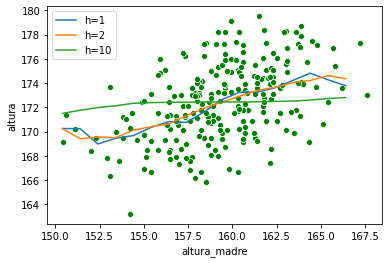

In [ ]:
sns.scatterplot(x=Alturas['altura_madre'], y=Alturas['altura'][Filtro_M],data=Alturas, color = "green")
plt.plot(b,a,label='h=1')
plt.plot(b,c,label='h=2')
plt.plot(b,d,label='h=10')
plt.legend(loc="upper left")

16 Calcular ahora predicciones para la altura del hijo conociendo la altura de la madre haciendo promedio de vecinos cercanos. Para ello, implementar una función que tenga por input una columna de
un dataframe con los X (variable predictora), otra columna con sus correspondientes valores de Y
(variable respuesta), un nuevo valor x_nuevo donde queremos predecir, y la cantidad k de vecinos
más cercanos de x_nuevo que vamos a utilizar a la hora de hacer promedios.
predigo_promedio_vecinos(X, Y, x_nuevo, k)

In [ ]:
 def predigo_promedio_vecino(X,Y,x_nuevo,k):
  X_lista=X.tolist()
  Y_lista=Y.tolist()
  lista=[]
  for i in range (len(X_lista)):
    a=np.sqrt((x_nuevo-X_lista[i])**2)
    lista.append((X_lista[i],Y_lista[i],a))
  # print(lista)
  lista.sort(key=lambda tup:tup[2])
  # print(lista)
  lista_resumida=lista[:k]
  
  lista_alturas_vecinos=[]
  for i in range (len(lista_resumida)):
    lista_alturas_vecinos.append((lista_resumida[i][1]))      
  
  return (sum(lista_alturas_vecinos)/ len(lista_alturas_vecinos))


In [ ]:
predigo_promedio_vecino(X,Y,160,3)

175.16666666666666

17. Implementar una función que tenga por entrada una columna de un dataframe con los X (variable
predictora), otra columna con sus correspondientes valores de Y (variable respuesta) y devuelva la
pendiente y la ordenada al origen de la recta de cuadrados mínimos: cuadrados_minimos(X,Y).

In [ ]:
def cuadrados_minimos(x,y):
  x_lista=x.tolist()
  y_lista=y.tolist()
  
  xp= sum(x_lista) / len(x_lista)
  yp= sum(y_lista) / len(y_lista)
  
  marriba=[]
  mabajo=[]
  lista_m=[]
  lista_b=[]
  for i in range(len(x_lista)):
    a=(x_lista[i]-xp)
    b=(y_lista[i]-yp)
    marriba.append(a*b)
    mabajo.append(a**2)
    
  for i in range(len(x_lista)):
    lista_m.append(marriba[i]/mabajo[i])
  for i in range(len(x_lista)):
    c=(lista_m[i]*xp)
    lista_b.append(yp -c)

  
  return (lista_m, lista_b)

In [ ]:
x=Alturas_M['altura_madre']
y=Alturas_M['altura']

cuadrados_minimos(x,y)

18. Implementar una función que tenga por entrada un conjunto de valores X, sus correspondientes
valores de Y y un nuevo valor x_nuevo donde queremos predecir la variable respuesta utilizando la
recta de cuadrados mínimos construida con los datos X e Y: predigo_con_cuadrados_minimos(X,Y,
x_nuevo). Predecir la altura de un hijo varón cuya madre mide 156:5 cm utilizando la recta de
mínimos cuadrados.

In [ ]:
def predigo_con_cuadrados_minimos(x,y, x_nuevo):
  filtro_1= x == x_nuevo
  x_new= x[filtro_1]
  y_new=y[filtro_1]
  
  ctes_minimos= cuadrados_minimos(x_new,y_new)
  recta_minimos=[]
  for i in range(y_new.shape[0]):
    j= ((ctes_minimos[0][i] * x_new[i])+ ctes_minimos[1][i])
    k= y_new[i]
    recta_minimos.append((k-j)**2)
  return sum(recta_minimos)/ len(recta_minimos)


In [ ]:
x=Alturas_M['altura_madre']
y=Alturas_M['altura']
x_nuevo= 156.5

predigo_con_cuadrados_minimos(x,y, x_nuevo)

19. Graficar la altura de la mamá (en el eje x) vs. altura del hije (eje y), utilizando un color por cada
género y agregar la recta de cuadrados mínimos para cada género.

Si te quedas con ganas de más, en esta otra página podrás acceder a más datos como los que usaste en
esta guía. A medida que cambia el tamaño n del conjunto de datos, se incluyen nuevos casos (se agregan
más las al archivo) o se excluyen si es lo reducimos.